In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

class LIF:
    
    def __init__(self):  
        self.tau = 10            ## Predefined value of tau
        self.x_res = 0           ## Resting potential
        self.theta = 1.5         ## Threshold
        self.dt = 0.1         ## Discretization step for the simulation
        
    def Response(self, Input, tau):
        self.tau = tau
        T = np.shape(Input)[0]
        x = np.zeros([T])
        Spike = np.zeros([T])
        
        x[0] = self.x_res
        for t in range(1, T):
            x[t] = (1 - self.dt / self.tau) * x[t-1] + self.dt / self.tau * Input[t]
            if x[t] >= self.theta:
              spike=1
            else:
              spike = 0

            Spike[t] = spike
            x[t] = self.x_res * spike + x[t] * (1 - spike)
            
        return x, Spike
        
    def Interval(self, Input, tau):
          self.tau = tau
          T = np.shape(Input)[0]
          x = np.zeros([T])
          x[0] = self.x_res
          last_spike_time = -np.inf 
          interval = 0
          for t in range(1, T):
              x[t] = (1 - self.dt / self.tau) * x[t-1] + self.dt / self.tau * Input[t]
              if x[t] >= self.theta:
                  spike = 1

                  interval = t - last_spike_time
                  last_spike_time = t
              else:
                  spike = 0
                
        
              x[t] = self.x_res * spike + x[t] * (1 - spike)

          return interval
            
   






the interval is 13.8


(0.0, 2.0)

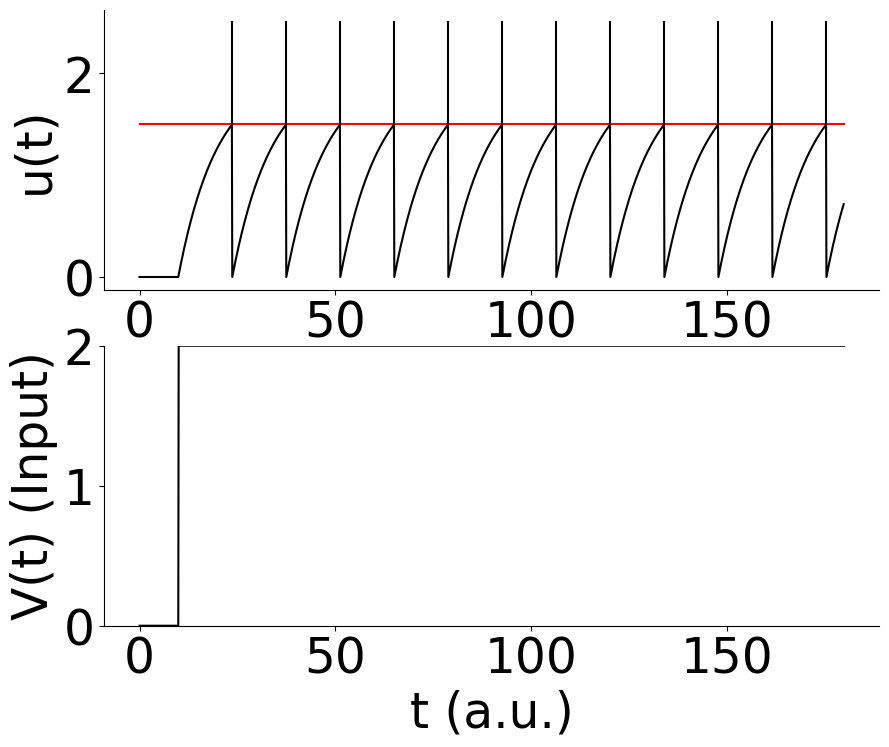

In [ ]:
lif=LIF()

T=1800
Input=np.concatenate([np.zeros([100]),np.ones([T-100])*2])  #input
                                                                        

tau=10    ## Value of tau              
    
x,Spike=lif.Response(Input,tau)       ## Computation of the neuron response
interval = lif.Interval(Input,tau)
print("the interval is {}".format(interval *lif.dt))

## Creation of the figure

plt.rcParams.update({'font.size': 35})

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,8))
plt.rcParams['figure.constrained_layout.use'] = True


## Plot of the activity of the neuron across time
ax1.plot(np.arange(0,T)*lif.dt,x,color='black')

## Plot of the threshold
ax1.plot([0, T*lif.dt],[lif.theta, lif.theta],color='red')


## In the following loop, a draw a vertical line for each instance the neuron has fired
for t in range(T):
    
    ## If the neuron fires
    if Spike[t]==1.:
        
        ## Draw the vertical line
        ax1.plot([t*lif.dt,t*lif.dt],[lif.theta, lif.theta+1],color='black')

## Plot of the input
ax2.plot(np.arange(0,T)*lif.dt,Input,color='black')
## Set labels
ax1.set_xlabel('t (a.u.)')
ax1.set_ylabel('u(t)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.set_xlabel('t (a.u.)')
ax2.set_ylabel('V(t) (Input)')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylim([0,2])

27.700000000000003
55.400000000000006
83.2
[20, 40, 60]


Text(0, 0.5, 'Tint')

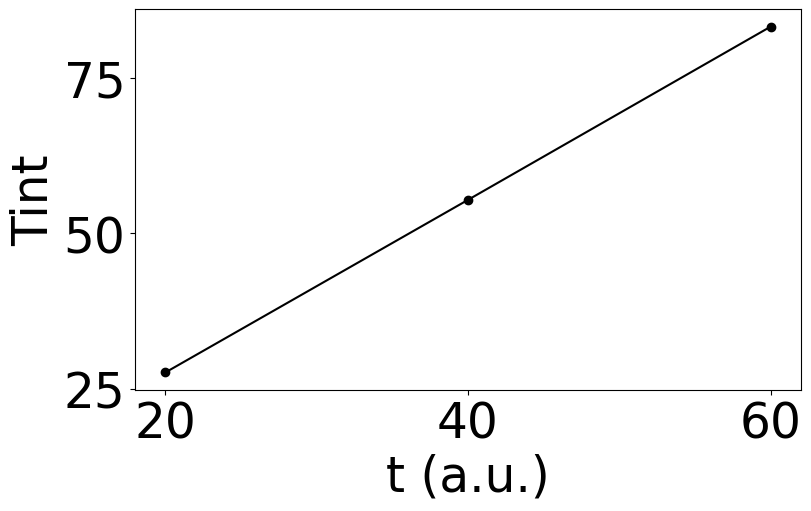

In [ ]:
Tint = []
tau_list = []
lif=LIF()
t = 1.386*tau
T=1800
Input=np.concatenate([np.zeros([100]),np.ones([T-100])*2])          
                                                                        

tau_value=[20,40,60]    # Value of tau              
for tau in tau_value:    
    x,Spike=lif.Response(Input,tau) 
    interval = lif.Interval(Input,tau)   
    t_interval = interval *lif.dt
    print(t_interval)
    Tint.append(t_interval)
    tau_list.append(tau)

print(tau_list)

fig = plt.figure(figsize=(8, 5))
plt.plot(tau_list,Tint,"-o",color='black')

## Set labels
plt.xlabel('t (a.u.)')
plt.ylabel('Tint')
